# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Juan Jose Bustamante Guiral
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [ ]:
import numpy as np
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import CubicSpline

tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo

# Hermite
hermite = PchipInterpolator(tiempos, distancias)

# Para obtener la velocidad se derivada
hermite_derivada = hermite.derivative()

# Posición y velocidad en t = 10
posicion_hermite = hermite(10)
velocidad_hermite = hermite_derivada(10)

print('Hermite:')
print(f'Posición en t=10: {posicion_hermite}')
print(f'Velocidad en t=10: {velocidad_hermite}')

# Spline cúbico
spline = CubicSpline(tiempos, distancias)

# Derivada del spline para velocidad
spline_derivada = spline.derivative()

# Posición y velocidad en t = 10
posicion_spline = spline(10)
velocidad_spline = spline_derivada(10)

print('Spline Cúbico:')
print(f'Posición en t=10: {posicion_spline}')
print(f'Velocidad en t=10: {velocidad_spline}')

# Tiempos entre 0 y 13
tiempos_nuevos = np.linspace(0, 13, 100)

# Velocidades con Hermite y Spline
velocidades_hermite = hermite_derivada(tiempos_nuevos)
velocidades_spline = spline_derivada(tiempos_nuevos)

# Mayor velocidad
max_vel_hermite = max(velocidades_hermite)
max_vel_spline = max(velocidades_spline)

print(f'Velocidad máxima Hermite: {max_vel_hermite}')
print(f'Velocidad máxima Spline: {max_vel_spline}')


Hermite:
Posición en t=10: 775.0561563517915
Velocidad en t=10: 74.82397394136808
Spline Cúbico:
Posición en t=10: 778.4190647482014
Velocidad en t=10: 75.82032374100719
Velocidad máxima Hermite: 80.9834494261642
Velocidad máxima Spline: 80.26530902000164


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

Coeficientes del polinomio de Newton:
[ 9.81000000e+00 -3.06500000e-06  6.25000000e-13  4.16666667e-18
 -1.04166667e-22]
Estimaciones de g para altitudes específicas:
g(5000 m) = 9.794654 m/s²
g(42000 m) = 9.681859 m/s²
g(90000 m) = 9.538416 m/s²


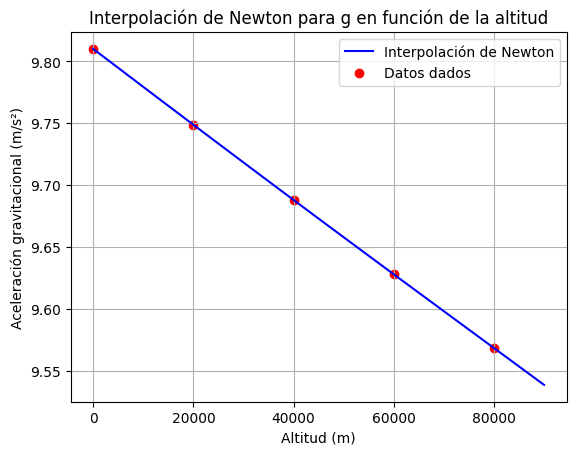

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array([0, 20000, 40000, 60000, 80000])       # metros
g = np.array([9.8100, 9.7487, 9.6879, 9.6278, 9.5682])  # m/s²


# Diferencias divididas
n = len(y)
dif = np.zeros((n, n))
dif[:, 0] = g  # Primera columna: valores de g

for j in range(1, n):
    for i in range(n - j):
        dif[i][j] = (dif[i+1][j-1] - dif[i][j-1]) / (y[i+j] - y[i])

# coeficientes del polinomio de Newton
coeficientes = dif[0, :]
print('Coeficientes del polinomio de Newton:')
print(coeficientes)

def polinomio_newton(x, x_datos, coef):
    '''
    Evaluar el polinomio de Newton en x.
    '''
    n = len(coef)
    resultado = coef[0]
    termino_producto = 1.0
    for i in range(1, n):
        termino_producto *= (x - x_datos[i - 1])
        resultado += coef[i] * termino_producto
    return resultado

# Evaluar en los datos
altitudes = [5000, 42000, 90000]
print('Estimaciones de g para altitudes específicas:')
for alt in altitudes:
    g_estimado = polinomio_newton(alt, y, coeficientes)
    print(f'g({alt} m) = {g_estimado:.6f} m/s²')


x_interp = np.linspace(0, 90000, 100)
g_interp = [polinomio_newton(x, y, coeficientes) for x in x_interp]

plt.plot(x_interp, g_interp, label='Interpolación de Newton', color='blue')
plt.scatter(y, g, color='red', label='Datos dados')
plt.xlabel('Altitud (m)')
plt.ylabel('Aceleración gravitacional (m/s²)')
plt.title('Interpolación de Newton para g en función de la altitud')
plt.grid()
plt.legend()
plt.show()


# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



Coeficientes del polinomio de Newton:
[ 3.60100000e+00 -1.83260000e-02  6.20800000e-05 -1.25641667e-07
  1.81275000e-10 -1.82681217e-13  1.22461907e-16 -6.14984601e-20
  2.46888682e-23]
Estimaciones de densidad del aire:
ρ(250 K) = 1.397533 kg/m³
ρ(800 K) = 0.496409 kg/m³
ρ(3000 K) = 1561.165867 kg/m³


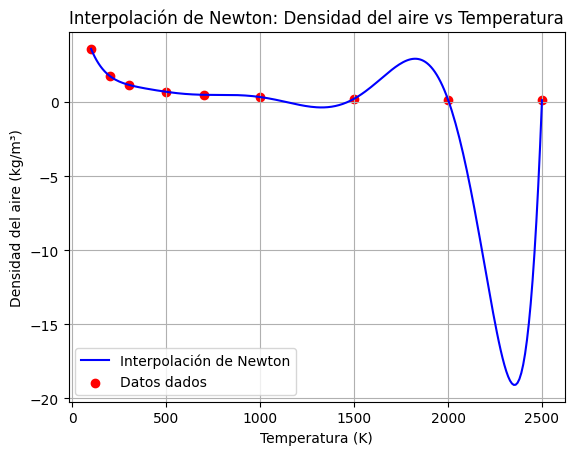

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500])
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394])

# Diferencias divididas de Newton
n = len(T)
diff = np.zeros((n, n))
diff[:, 0] = rho

for j in range(1, n):
    for i in range(n - j):
        diff[i][j] = (diff[i+1][j-1] - diff[i][j-1]) / (T[i+j] - T[i])

# Coeficientes
coef = diff[0, :]
print('Coeficientes del polinomio de Newton:')
print(coef)

def polinomio_newton(x, x_datos, coef):
    '''
    Evaluar el polinomio de Newton en x.
    '''
    n = len(coef)
    resultado = coef[0]
    producto = 1.0
    for i in range(1, n):
        producto *= (x - x_datos[i-1])
        resultado += coef[i] * producto
    return resultado

# Estimar la densidad
valores_estimacion = [250, 800, 3000]
print('Estimaciones de densidad del aire:')
for temp in valores_estimacion:
    densidad = polinomio_newton(temp, T, coef)
    print(f'ρ({temp} K) = {densidad:.6f} kg/m³')


T_eval = np.arange(100, 2501, 10)
rho_eval = [polinomio_newton(temp, T, coef) for temp in T_eval]

plt.plot(T_eval, rho_eval, label='Interpolación de Newton', color='blue')
plt.scatter(T, rho, color='red', label='Datos dados')
plt.xlabel('Temperatura (K)')
plt.ylabel('Densidad del aire (kg/m³)')
plt.title('Interpolación de Newton: Densidad del aire vs Temperatura')
plt.legend()
plt.grid()
plt.show()


# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

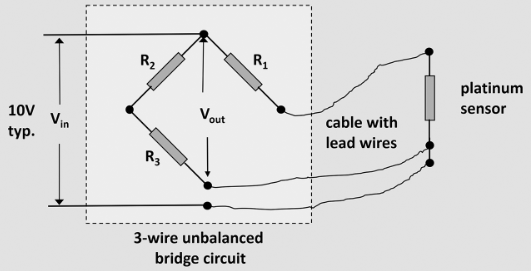




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

Voltaje estimado para R = 139.27 Ω: -0.3701534922704801 V
Resistencia estimada cuando V = 0: R = 119.96996996996997 Ω (V = 0.0006041101339757023 V)


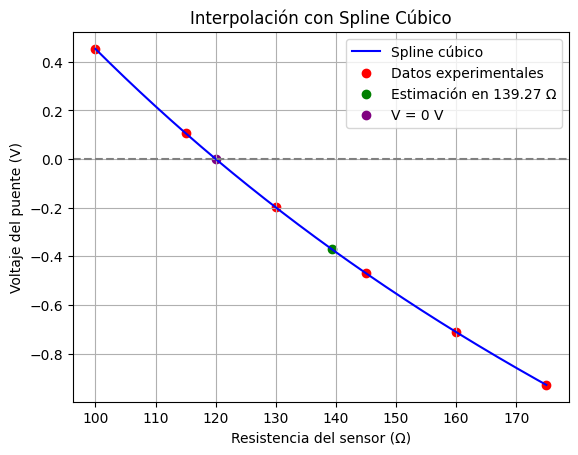

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Datos
resistencia = np.array([100, 115, 130, 145, 160, 175])
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])

# Spline cúbico
spline = CubicSpline(resistencia, voltaje)

# Estimar el voltaje para R = 139.27
R = 139.27
V_estimado = spline(R)
print(f'Voltaje estimado para R = {R} Ω: {V_estimado} V')

# Estimar la resistencia R para la cual V = 0
R_val = np.linspace(100, 175, 1000)
V_val = spline(R_val)
indice_cero = np.argmin(np.abs(V_val))
R_cero = R_val[indice_cero]
V_cero = V_val[indice_cero]
print(f'Resistencia estimada cuando V = 0: R = {R_cero} Ω (V = {V_cero} V)')

plt.plot(R_val, V_val, label='Spline cúbico', color='blue')
plt.scatter(resistencia, voltaje, color='red', label='Datos experimentales')
plt.axhline(0, color='gray', linestyle='--')
plt.scatter([R], [V_estimado], color='green', label=f'Estimación en {R} Ω')
plt.scatter([R_cero], [V_cero], color='purple', label='V = 0 V')
plt.xlabel('Resistencia del sensor (Ω)')
plt.ylabel('Voltaje del puente (V)')
plt.title('Interpolación con Spline Cúbico')
plt.grid()
plt.legend()
plt.show()


# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

La longitud de onda estimada para n = 1.52 es aproximadamente 4482.27 Å


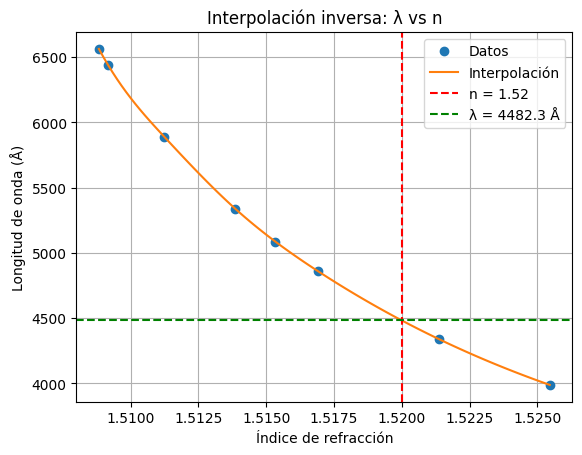

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Datos
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

# Invertimos para interpolar lambda en función del índice ya que los datos estan de forma descendente
interp_inversa = CubicSpline(indice_refraccion, lambda_angstrom)

# Valor deseado de índice de refracción
n_deseado = 1.520

# Estimamos la longitud de onda
lambda_estimado = interp_inversa(n_deseado)
print(f'La longitud de onda estimada para n = {n_deseado} es aproximadamente {lambda_estimado:.2f} Å')

n_vals = np.linspace(min(indice_refraccion), max(indice_refraccion), 100)
lambda_vals = interp_inversa(n_vals)

plt.plot(indice_refraccion, lambda_angstrom, 'o', label='Datos')
plt.plot(n_vals, lambda_vals, '-', label='Interpolación')
plt.axvline(n_deseado, color='red', linestyle='--', label=f'n = {n_deseado}')
plt.axhline(lambda_estimado, color='green', linestyle='--', label=f'λ = {lambda_estimado:.1f} Å')
plt.xlabel('Índice de refracción')
plt.ylabel('Longitud de onda (Å)')
plt.legend()
plt.grid()
plt.title('Interpolación inversa: λ vs n')
plt.show()
